In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("website_wata.csv")

In [3]:
# Summary statistics
print(df.describe())

        Page Views  Session Duration  Bounce Rate  Time on Page  \
count  2000.000000       2000.000000  2000.000000   2000.000000   
mean      4.950500          3.022045     0.284767      4.027439   
std       2.183903          3.104518     0.159781      2.887422   
min       0.000000          0.003613     0.007868      0.068515   
25%       3.000000          0.815828     0.161986      1.935037   
50%       5.000000          1.993983     0.266375      3.315316   
75%       6.000000          4.197569     0.388551      5.414627   
max      14.000000         20.290516     0.844939     24.796182   

       Previous Visits  Conversion Rate  
count      2000.000000      2000.000000  
mean          1.978500         0.982065  
std           1.432852         0.065680  
min           0.000000         0.343665  
25%           1.000000         1.000000  
50%           2.000000         1.000000  
75%           3.000000         1.000000  
max           9.000000         1.000000  


In [4]:
# Count of each Traffic Source
print(df['Traffic Source'].value_counts())

Traffic Source
Organic     786
Paid        428
Referral    301
Social      269
Direct      216
Name: count, dtype: int64


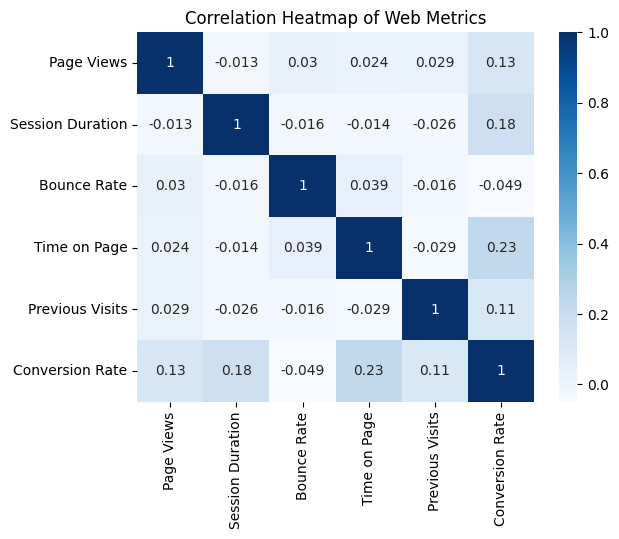

In [6]:
#Correlation heatmap
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Web Metrics')
plt.show()

In [8]:
df['Engagement Score'] = (df['Page Views'] * df['Time on Page']) / df['Bounce Rate'] + 0.01
df.to_csv('cleaned_website_wata.csv', index=False)

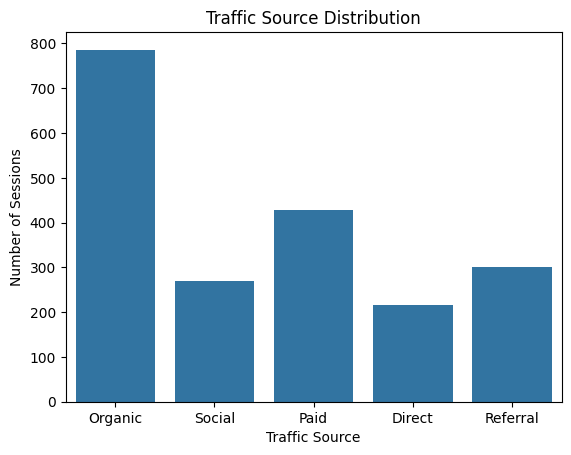

In [10]:
# Traffic Source Distribution

sns.countplot(x='Traffic Source', data=df)
plt.title('Traffic Source Distribution')
plt.xlabel('Traffic Source')
plt.ylabel('Number of Sessions')
plt.show()

/tmp/ipython-input-2346336605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Traffic Source', y='Conversion Rate', data=df, estimator=np.mean, palette='Set1')


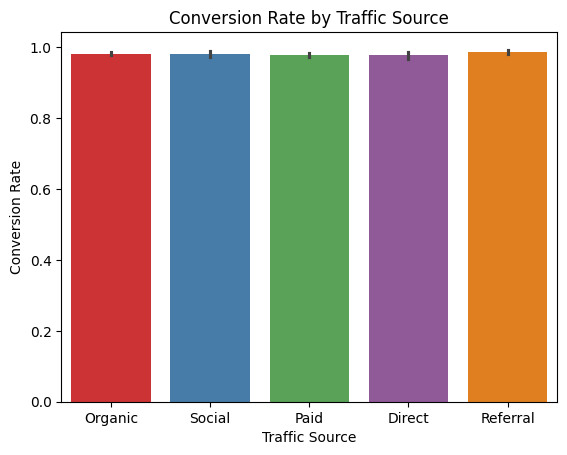

In [11]:
# Conversion Rate by Traffic Source
sns.barplot(x='Traffic Source', y='Conversion Rate', data=df, estimator=np.mean, palette='Set1')
plt.title('Conversion Rate by Traffic Source')
plt.show()

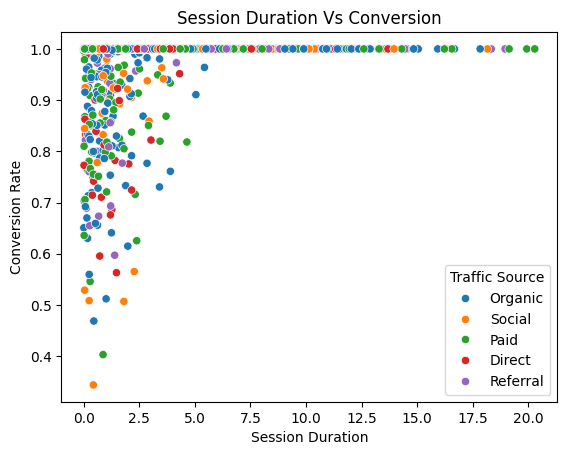

In [12]:
# Session Duration Vs Conversion
sns.scatterplot(x='Session Duration', y='Conversion Rate', hue='Traffic Source', data=df)
plt.title('Session Duration Vs Conversion')
plt.show()

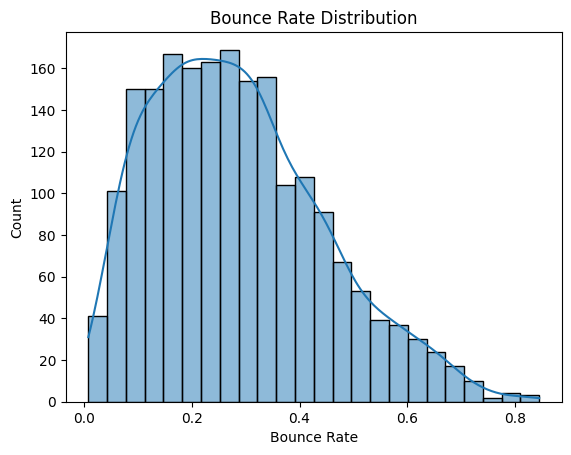

In [13]:
# Bounce Rate Distribution

sns.histplot(df['Bounce Rate'], kde=True)
plt.title('Bounce Rate Distribution')
plt.show()